In [1]:
import pandas as pd

# Read the cargo TSV file
cargo_data = pd.read_csv('//Users/zhujiaqi/trifecta/BKB/bgb_cargo.tsv', sep='\t', skiprows=1)

# Display the initial DataFrame and its data types
print("Initial DataFrame:")
print(cargo_data)
print("Initial data types:")
print(cargo_data.dtypes)

# Convert columns to nullable integer types
# List of columns to convert
columns_to_convert = ['carProductId','carSpecificationId','carUnit', 'carValueGuldens','carValueStuivers','carValuePenningen', 'carValueLichtGuldens', 'carValueLichtStuivers','carValueLichtPenningen', 'carOrder']

for col in columns_to_convert:
    cargo_data[col] = cargo_data[col].astype('Int64')

    
# Display the updated DataFrame and its data types
print("\nUpdated DataFrame:")
print(cargo_data)
print("Updated data types:")
print(cargo_data.dtypes)

/var/folders/5g/vgjq024s5fgc9pf2fchw5m6c0000gn/T/ipykernel_82778/3308359834.py:4: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  cargo_data = pd.read_csv('//Users/zhujiaqi/trifecta/BKB/bgb_cargo.tsv', sep='\t', skiprows=1)


Initial DataFrame:
         carId carVoyageId  carProductId  carSpecificationId  carUnit  \
0       645880       99353        1290.0                 NaN      NaN   
1       645881       99353        1230.0               848.0     88.0   
2       645877       99353        1133.0             16295.0     88.0   
3       645878       99353        1133.0               848.0     88.0   
4       645879       99353        1157.0                 NaN     88.0   
...        ...         ...           ...                 ...      ...   
253385  903925      117548        1290.0                 NaN     69.0   
253386  903928      117422        1290.0                 NaN     69.0   
253387  903927      117422        2364.0              2744.0      NaN   
253388  903929      113648        2364.0              2744.0      NaN   
253389  903930      113648        1290.0                 NaN     69.0   

       carQuantity carQuantityNumeric  carValue  carValueGuldens  \
0              NaN                Na

In [2]:
cargo_data.head()

,carId,carVoyageId,carProductId,carSpecificationId,carUnit,carQuantity,carQuantityNumeric,carValue,carValueGuldens,carValueStuivers,...,carValueLicht,carValueLichtGuldens,carValueLichtStuivers,carValueLichtPenningen,carRemarks,carOrder,changed_when,changed_by,timestamp,all_fields
0,645880,99353,1290,<NA>,<NA>,NaN,NaN,"1.623,30",1623,3,...,NaN,<NA>,<NA>,<NA>,NaN,9,6/25/08 12:42,jsc,8/5/13 10:50,samen
1,645881,99353,1230,848,88,4,4,"371,8",371,8,...,NaN,<NA>,<NA>,<NA>,NaN,10,5/21/08 14:41,mjo,8/5/13 10:50,"zakhorloge zilveren, voor Japan pees"
2,645877,99353,1133,16295,88,4,4,NaN,<NA>,<NA>,...,NaN,<NA>,<NA>,<NA>,NaN,7,2/25/13 10:09,DorineS,8/5/13 10:50,"moir√© gouden, voor Japan pees"
3,645878,99353,1133,848,88,6,6,NaN,<NA>,<NA>,...,NaN,<NA>,<NA>,<NA>,NaN,8,2/25/13 10:09,DorineS,8/5/13 10:50,"moir√© zilveren, voor Japan pees"
4,645879,99353,1157,<NA>,88,65,65,"1.487,17",1487,17,...,NaN,<NA>,<NA>,<NA>,NaN,11,6/9/08 9:04,mjo,8/5/13 10:50,perpetuanen pees


In [3]:
# Drop columns that are not needed for analysis
columns_to_drop = ['carRemarks','carOrder', 'changed_when', 'changed_by', 'timestamp']
cargo_data = cargo_data.drop(columns=columns_to_drop)

In [4]:
cargo_data.head()

,carId,carVoyageId,carProductId,carSpecificationId,carUnit,carQuantity,carQuantityNumeric,carValue,carValueGuldens,carValueStuivers,carValuePenningen,carValueLicht,carValueLichtGuldens,carValueLichtStuivers,carValueLichtPenningen,all_fields
0,645880,99353,1290,<NA>,<NA>,NaN,NaN,"1.623,30",1623,3,<NA>,NaN,<NA>,<NA>,<NA>,samen
1,645881,99353,1230,848,88,4,4,"371,8",371,8,<NA>,NaN,<NA>,<NA>,<NA>,"zakhorloge zilveren, voor Japan pees"
2,645877,99353,1133,16295,88,4,4,NaN,<NA>,<NA>,<NA>,NaN,<NA>,<NA>,<NA>,"moir√© gouden, voor Japan pees"
3,645878,99353,1133,848,88,6,6,NaN,<NA>,<NA>,<NA>,NaN,<NA>,<NA>,<NA>,"moir√© zilveren, voor Japan pees"
4,645879,99353,1157,<NA>,88,65,65,"1.487,17",1487,17,<NA>,NaN,<NA>,<NA>,<NA>,perpetuanen pees


In [5]:
# Read the voyage TSV file
voyage_data = pd.read_csv('//Users/zhujiaqi/trifecta/BKB/bgb_voyage.tsv', sep='\t', skiprows=1)

# Display the initial DataFrame and its data types
print("DataFrame:")
print(voyage_data)
print("data types:")
print(voyage_data.dtypes)

DataFrame:
                                                url   voyId  voyBookingDay  \
0          https://bgb.huygens.knaw.nl/bgb/voyage/1   99351            NaN   
1          https://bgb.huygens.knaw.nl/bgb/voyage/2   99352            NaN   
2          https://bgb.huygens.knaw.nl/bgb/voyage/3   99353            NaN   
3          https://bgb.huygens.knaw.nl/bgb/voyage/4   99354            NaN   
4          https://bgb.huygens.knaw.nl/bgb/voyage/5   99355            NaN   
...                                             ...     ...            ...   
18317  https://bgb.huygens.knaw.nl/bgb/voyage/18813  118272            NaN   
18318  https://bgb.huygens.knaw.nl/bgb/voyage/18814  118273            NaN   
18319  https://bgb.huygens.knaw.nl/bgb/voyage/18815  118274            NaN   
18320  https://bgb.huygens.knaw.nl/bgb/voyage/18816  118276            NaN   
18321  https://bgb.huygens.knaw.nl/bgb/voyage/18817  118277            NaN   

       voyBookingMonth  voyBookingYear  voyDeparture

In [6]:
# Drop columns that are not needed for analysis
columns_to_drop = ['voyRemarksForEditor', 'created_when', 'created_by', 'changed_when', 'changed_by', 'timestamp']
voyage_data = voyage_data.drop(columns=columns_to_drop)

In [7]:
# merge bgb_cargo.tsv with bgb_voyage.tsv
cargo_voyage_data = pd.merge(cargo_data, voyage_data, left_on='carVoyageId', right_on='voyId')
len(cargo_voyage_data)

220621

In [8]:
cargo_voyage_data

,carId,carVoyageId,carProductId,carSpecificationId,carUnit,carQuantity,carQuantityNumeric,carValue,carValueGuldens,carValueStuivers,...,voyageDAS,voySourceId,voynumber,voyImage,voyRemarksForEndUser,voyDepartureRegioId,voyArrivalRegioId,voyFolioNummer,all_fields_y,first_ship_name
0,645880,99353,1290,<NA>,<NA>,NaN,NaN,"1.623,30",1623,3,...,95667.0,147.0,3,NaN,NaN,3185,3129,3,3 Batavia Batavia Amsterdam Republiek 1790 1...,Doggersbank
1,645881,99353,1230,848,88,4,4,"371,8",371,8,...,95667.0,147.0,3,NaN,NaN,3185,3129,3,3 Batavia Batavia Amsterdam Republiek 1790 1...,Doggersbank
2,645877,99353,1133,16295,88,4,4,NaN,<NA>,<NA>,...,95667.0,147.0,3,NaN,NaN,3185,3129,3,3 Batavia Batavia Amsterdam Republiek 1790 1...,Doggersbank
3,645878,99353,1133,848,88,6,6,NaN,<NA>,<NA>,...,95667.0,147.0,3,NaN,NaN,3185,3129,3,3 Batavia Batavia Amsterdam Republiek 1790 1...,Doggersbank
4,645879,99353,1157,<NA>,88,65,65,"1.487,17",1487,17,...,95667.0,147.0,3,NaN,NaN,3185,3129,3,3 Batavia Batavia Amsterdam Republiek 1790 1...,Doggersbank
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220616,903794,105466,1290,<NA>,88,400,400,NaN,<NA>,<NA>,...,NaN,131.0,6080,NaN,NaN,3129,3169,159,6080 Timor Batavia Batavia 1762 1762 159 H...,Hercules
220617,903821,103465,1676,1484,<NA>,NaN,NaN,NaN,<NA>,<NA>,...,95083.0,136.0,4083,NaN,NaN,3185,3059,206,4083 Kaap de Goede Hoop Kaap de Goede Hoop Ams...,Ouderamstel
220618,903822,103465,1290,<NA>,88,100,100,"160,13",160,13,...,95083.0,136.0,4083,NaN,NaN,3185,3059,206,4083 Kaap de Goede Hoop Kaap de Goede Hoop Ams...,Ouderamstel
220619,903827,103471,1757,1484,<NA>,NaN,NaN,NaN,<NA>,<NA>,...,95016.0,135.0,4089,NaN,NaN,3185,3059,183,4089 Kaap de Goede Hoop Kaap de Goede Hoop Ams...,Huis ten Donk


In [9]:
# find tarwe
cargo_voyage_data['carProductId'] = cargo_voyage_data['carProductId'].astype(str)
tarwe=cargo_voyage_data.loc[cargo_voyage_data['carProductId'] == '1203']
tarwe

,carId,carVoyageId,carProductId,carSpecificationId,carUnit,carQuantity,carQuantityNumeric,carValue,carValueGuldens,carValueStuivers,...,voyageDAS,voySourceId,voynumber,voyImage,voyRemarksForEndUser,voyDepartureRegioId,voyArrivalRegioId,voyFolioNummer,all_fields_y,first_ship_name
2243,647797,99546,1203,<NA>,102,500,500,"3.092,14",3092,14,...,95694.0,147.0,192,NaN,NaN,3059,3129,45,192 Batavia Batavia Kaap de Goede Hoop Kaap de...,Gouverneur-Generaal Maatsuijker
3327,665756,101458,1203,<NA>,69,6.000,6000,NaN,<NA>,<NA>,...,NaN,141.0,2078,NaN,NaN,3129,3162,103,2078 Banda-Neira Banda Batavia Batavia 1777 ...,Huis te Bijweg
4559,649932,99722,1203,<NA>,100,24,24,2.723,2723,<NA>,...,95407.0,148.0,368,NaN,NaN,3059,3129,52,368 Batavia Batavia Kaap de Goede Hoop Kaap de...,Wakkerheid
4613,649958,99725,1203,<NA>,100,10,10,"1.190,40",1190,4,...,95416.0,148.0,371,NaN,NaN,3059,3129,52,371 Batavia Batavia Kaap de Goede Hoop Kaap de...,Dolfijn
4614,649960,99726,1203,<NA>,100,10,10,"1.154,15,8",1154,15,...,95410.0,148.0,372,NaN,NaN,3059,3129,52,372 Batavia Batavia Kaap de Goede Hoop Kaap de...,Parel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219133,900959,118092,1203,17616,102,370,370,NaN,<NA>,<NA>,...,93842.0,113.0,18663,NaN,The invoice states as one of the ship's names ...,3059,3082,476,18663 Ceylon Kaap de Goede Hoop Kaap de Goede...,Huis te Assenburg
220118,902533,118192,1203,2431,100,4,4,6.516,6516,<NA>,...,NaN,145.0,18758,NaN,The True Britton was a private ship rented by ...,3068,3082,311,18758 Ceylon Surat Surat The True Britton was...,The True Britton
220138,902553,118196,1203,9534,69,38.629,38629,"2.619,17",2619,17,...,NaN,145.0,18762,NaN,NaN,3076,3082,321,18762 Ceylon Malabar 1785 1785 321 Verwac...,Verwachting
220145,902560,118198,1203,<NA>,69,55.814,55814,"2.860,4,8",2860,4,...,NaN,145.0,18764,NaN,NaN,3076,3082,321,18764 Colombo Ceylon Malabar 1785 1785 321 ...,Verwachting


In [11]:
import pandas as pd

# Define the file path
file_path = 'file:///Users/zhujiaqi/trifecta/BKB/bgb_place.tsv'

# Read the TSV file without headers and specify column names
df_place = pd.read_csv(file_path, sep='\t', skiprows=1)

In [12]:
df_place

,id,naam,added_when,added_by,timestamp,regio,voc_place_ID,standardized toponym,URI,lat,long
0,902,Kupang,5/6/08 11:43,Admin,5/6/08 11:44,3169.0,vocUniquePlaceID_5164,Kupang ID,http://sws.geonames.org/2057087/,-10.17083,123.60694
1,903,Pontianak,5/6/08 11:43,Admin,5/6/08 11:44,3171.0,vocUniquePlaceID_5165,Pontianak ID,http://sws.geonames.org/1630789/,-0.03194,109.32500
2,900,Kisar,5/6/08 11:43,Admin,5/6/08 11:44,3162.0,vocUniquePlaceID_5166,Pulau Kisar ID,http://sws.geonames.org/1639966/,-8.06112,127.18200
3,901,Solor,5/6/08 11:43,Admin,5/6/08 11:44,3169.0,vocUniquePlaceID_5167,Pulau Solor ID,http://sws.geonames.org/1626638/,-8.46650,123.00160
4,899,"Ai, Pulau",5/6/08 11:43,Admin,5/6/08 11:44,3162.0,vocUniquePlaceID_5168,Pulau Ai ID,http://sws.geonames.org/1651834/,-4.52720,129.77403
...,...,...,...,...,...,...,...,...,...,...,...
142,962,Kedah,4/5/13 13:25,NicolienK,4/5/13 13:26,3115.0,vocUniquePlaceID_5270,Kuala Kedah MY,http://sws.geonames.org/1736305/,6.10000,100.30000
143,963,Calicoilan,4/9/13 15:47,DorineS,4/9/13 15:47,NaN,vocUniquePlaceID_5208,Kāyankulam IN,http://sws.geonames.org/1267360/,9.18173,76.50093
144,964,Kaap Comorijn,4/9/13 15:48,DorineS,4/17/13 11:43,NaN,vocUniquePlaceID_5214,Cape Comorin IN,http://sws.geonames.org/1273845/,8.07730,77.55148
145,965,Mandar,4/15/13 10:15,DorineS,4/15/13 10:15,NaN,vocUniquePlaceID_5275,Mandar ID,http://sws.geonames.org/7589528/,-3.47250,119.39080


In [13]:
# Drop columns 
columns_to_drop = ['added_when', 'added_by', 'timestamp']
df_place = df_place.drop(columns=columns_to_drop)

In [14]:
import pandas as pd

# Define the file path
file_path = 'file:///Users/zhujiaqi/trifecta/BKB/bgb_regio.tsv'

# Define column names
column_names = ['id', 'naam', 'added_when', 'added_by', 'timestamp']
    
# Read the TSV file without headers and specify column names
df_regio = pd.read_csv(file_path, sep='\t',skiprows=1)

In [15]:
df_regio

,id,naam,added_when,added_by,timestamp
0,3059,Kaap de Goede Hoop,5/6/08 11:46,Admin,5/6/08 11:47
1,3061,Mauritius,5/6/08 11:46,Admin,5/6/08 11:47
2,3062,Mokka,5/6/08 11:46,Admin,5/6/08 11:47
3,3063,Perzië,5/6/08 11:46,Admin,5/6/08 11:47
4,3068,Surat,5/6/08 11:46,Admin,5/6/08 11:47
5,3076,Malabar,5/6/08 11:46,Admin,5/6/08 11:47
6,3082,Ceylon,5/6/08 11:46,Admin,5/6/08 11:47
7,3093,Coromandel,5/6/08 11:46,Admin,5/6/08 11:47
8,3106,Bengalen,5/6/08 11:46,Admin,5/6/08 11:47
9,3113,Siam,5/6/08 11:46,Admin,5/6/08 11:47


In [16]:
# Drop columns 
columns_to_drop = ['added_when', 'added_by', 'timestamp']
df_regio = df_regio.drop(columns=columns_to_drop)

In [17]:
# merge
place_regio_data = pd.merge(df_place, df_regio, left_on='regio', right_on='id')
place_regio_data

,id_x,naam_x,regio,voc_place_ID,standardized toponym,URI,lat,long,id_y,naam_y
0,902,Kupang,3169.0,vocUniquePlaceID_5164,Kupang ID,http://sws.geonames.org/2057087/,-10.17083,123.60694,3169,Timor
1,901,Solor,3169.0,vocUniquePlaceID_5167,Pulau Solor ID,http://sws.geonames.org/1626638/,-8.46650,123.00160,3169,Timor
2,903,Pontianak,3171.0,vocUniquePlaceID_5165,Pontianak ID,http://sws.geonames.org/1630789/,-0.03194,109.32500,3171,Pontianak
3,900,Kisar,3162.0,vocUniquePlaceID_5166,Pulau Kisar ID,http://sws.geonames.org/1639966/,-8.06112,127.18200,3162,Banda
4,899,"Ai, Pulau",3162.0,vocUniquePlaceID_5168,Pulau Ai ID,http://sws.geonames.org/1651834/,-4.52720,129.77403,3162,Banda
...,...,...,...,...,...,...,...,...,...,...
125,934,Amsterdam,3185.0,vocUniquePlaceID_0207,Amsterdam NL,http://sws.geonames.org/2759794/,52.37403,4.88969,3185,Republiek
126,936,Rotterdam,3185.0,vocUniquePlaceID_3933,Rotterdam NL,http://sws.geonames.org/2747891/,51.92250,4.47917,3185,Republiek
127,937,Hoorn,3185.0,vocUniquePlaceID_2259,Hoorn NL,http://sws.geonames.org/2753638/,52.64250,5.05972,3185,Republiek
128,954,Zeeland,3185.0,vocUniquePlaceID_5072,Zeeland NL,http://sws.geonames.org/2744011/,51.69750,5.67639,3185,Republiek


In [18]:
# merge
tarwe_departure_place = pd.merge(tarwe, place_regio_data, left_on='voyDeparturePlaceId', right_on='id_x')
tarwe_departure_place
# due to merge, "id_x" and naam_x" columns are places, "id_y" and "naam_y" columns are regions

,carId,carVoyageId,carProductId,carSpecificationId,carUnit,carQuantity,carQuantityNumeric,carValue,carValueGuldens,carValueStuivers,...,id_x,naam_x,regio,voc_place_ID,standardized toponym,URI,lat,long,id_y,naam_y
0,647797,99546,1203,<NA>,102,500,500,"3.092,14",3092,14,...,791,Kaap de Goede Hoop,3059.0,vocUniquePlaceID_0970,Cape of Good Hope ZA,http://sws.geonames.org/3367577/,-34.35027,18.47909,3059,Kaap de Goede Hoop
1,649932,99722,1203,<NA>,100,24,24,2.723,2723,<NA>,...,791,Kaap de Goede Hoop,3059.0,vocUniquePlaceID_0970,Cape of Good Hope ZA,http://sws.geonames.org/3367577/,-34.35027,18.47909,3059,Kaap de Goede Hoop
2,649958,99725,1203,<NA>,100,10,10,"1.190,40",1190,4,...,791,Kaap de Goede Hoop,3059.0,vocUniquePlaceID_0970,Cape of Good Hope ZA,http://sws.geonames.org/3367577/,-34.35027,18.47909,3059,Kaap de Goede Hoop
3,649960,99726,1203,<NA>,100,10,10,"1.154,15,8",1154,15,...,791,Kaap de Goede Hoop,3059.0,vocUniquePlaceID_0970,Cape of Good Hope ZA,http://sws.geonames.org/3367577/,-34.35027,18.47909,3059,Kaap de Goede Hoop
4,649964,99727,1203,<NA>,100,10,10,"1.190,40",1190,4,...,791,Kaap de Goede Hoop,3059.0,vocUniquePlaceID_0970,Cape of Good Hope ZA,http://sws.geonames.org/3367577/,-34.35027,18.47909,3059,Kaap de Goede Hoop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
876,876588,116899,1203,<NA>,69,588.000,588000,NaN,<NA>,<NA>,...,929,Hooghly,3106.0,vocUniquePlaceID_2247,Hooghly IN,http://sws.geonames.org/1269911/,22.82893,88.20099,3106,Bengalen
877,876613,116900,1203,<NA>,69,300.000,300000,NaN,<NA>,<NA>,...,929,Hooghly,3106.0,vocUniquePlaceID_2247,Hooghly IN,http://sws.geonames.org/1269911/,22.82893,88.20099,3106,Bengalen
878,876680,116902,1203,<NA>,69,30.000,30000,NaN,<NA>,<NA>,...,929,Hooghly,3106.0,vocUniquePlaceID_2247,Hooghly IN,http://sws.geonames.org/1269911/,22.82893,88.20099,3106,Bengalen
879,837049,114994,1203,17651,139,1,1,NaN,<NA>,<NA>,...,816,Jaffna,3082.0,vocUniquePlaceID_2356,Jaffna LK,http://sws.geonames.org/1242833/,9.66845,80.00742,3082,Ceylon


In [19]:
# which regions are the regions where opium departed? 
tarwe_departure_place['naam_y'].value_counts()

Batavia                 470
Kaap de Goede Hoop      301
Surat                    67
Bengalen                 11
Republiek                10
Ceylon                    7
Java's Noordoostkust      5
Japan                     3
Malakka                   2
Amboina                   1
Bantam                    1
Cheribon                  1
China                     1
Palembang                 1
Name: naam_y, dtype: int64

In [20]:
tarwe_arrival_place = pd.merge(tarwe, place_regio_data, left_on='voyArrivalPlaceId', right_on='id_x')
tarwe_arrival_place
# due to merge, "id_x" and naam_x" columns are places, "id_y" and "naam_y" columns are regions

,carId,carVoyageId,carProductId,carSpecificationId,carUnit,carQuantity,carQuantityNumeric,carValue,carValueGuldens,carValueStuivers,...,id_x,naam_x,regio,voc_place_ID,standardized toponym,URI,lat,long,id_y,naam_y
0,647797,99546,1203,<NA>,102,500,500,"3.092,14",3092,14,...,861,Batavia,3129.0,vocUniquePlaceID_2357,Jakarta ID,http://sws.geonames.org/1642911/,-6.21462,106.84513,3129,Batavia
1,649932,99722,1203,<NA>,100,24,24,2.723,2723,<NA>,...,861,Batavia,3129.0,vocUniquePlaceID_2357,Jakarta ID,http://sws.geonames.org/1642911/,-6.21462,106.84513,3129,Batavia
2,649958,99725,1203,<NA>,100,10,10,"1.190,40",1190,4,...,861,Batavia,3129.0,vocUniquePlaceID_2357,Jakarta ID,http://sws.geonames.org/1642911/,-6.21462,106.84513,3129,Batavia
3,649960,99726,1203,<NA>,100,10,10,"1.154,15,8",1154,15,...,861,Batavia,3129.0,vocUniquePlaceID_2357,Jakarta ID,http://sws.geonames.org/1642911/,-6.21462,106.84513,3129,Batavia
4,649964,99727,1203,<NA>,100,10,10,"1.190,40",1190,4,...,861,Batavia,3129.0,vocUniquePlaceID_2357,Jakarta ID,http://sws.geonames.org/1642911/,-6.21462,106.84513,3129,Batavia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839,803968,113431,1203,659,100,1-apr,0.25,NaN,<NA>,<NA>,...,846,Ligor,3113.0,vocUniquePlaceID_5234,Nakhon Si Thammarat TH,http://sws.geonames.org/1151933/,8.43333,99.96667,3113,Siam
840,807502,113578,1203,6210,69,15.000,15000,NaN,<NA>,<NA>,...,837,Nagapattinam,3093.0,vocUniquePlaceID_3203,Nagapattinam IN,http://sws.geonames.org/7627073/,10.85000,79.74000,3093,Coromandel
841,824507,114388,1203,<NA>,69,15.000,15000,NaN,<NA>,<NA>,...,837,Nagapattinam,3093.0,vocUniquePlaceID_3203,Nagapattinam IN,http://sws.geonames.org/7627073/,10.85000,79.74000,3093,Coromandel
842,837049,114994,1203,17651,139,1,1,NaN,<NA>,<NA>,...,837,Nagapattinam,3093.0,vocUniquePlaceID_3203,Nagapattinam IN,http://sws.geonames.org/7627073/,10.85000,79.74000,3093,Coromandel


In [21]:
# which regions are the regions where opium arrived? 
tarwe_arrival_place['naam_y'].value_counts()

Batavia                 369
Java's Noordoostkust     58
Ceylon                   54
Bantam                   45
Amboina                  42
Banda                    38
Ternate                  38
Makassar                 38
Malakka                  32
Cheribon                 31
Sumatra's Westkust       30
Palembang                20
Japan                    13
Kaap de Goede Hoop       11
Bandjarmasin              7
Jambi                     6
Surat                     4
Siam                      4
Coromandel                3
Bengalen                  1
Name: naam_y, dtype: int64

In [22]:
rijst=cargo_voyage_data.loc[cargo_voyage_data['carProductId'] == '1171']
rijst

,carId,carVoyageId,carProductId,carSpecificationId,carUnit,carQuantity,carQuantityNumeric,carValue,carValueGuldens,carValueStuivers,...,voyageDAS,voySourceId,voynumber,voyImage,voyRemarksForEndUser,voyDepartureRegioId,voyArrivalRegioId,voyFolioNummer,all_fields_y,first_ship_name
1727,647410,99463,1171,16311,100,26 2/3,26.667,"1.004,40",1004,4,...,NaN,147.0,110,NaN,NaN,3130,3129,31,110 Batavia Batavia Cheribon Cheribon 1789 1...,Wilhelmina
1731,647414,99464,1171,<NA>,68,450,450,"24.131,50",24131,5,...,NaN,147.0,111,NaN,NaN,3130,3129,31,111 Batavia Batavia Cheribon Cheribon 1789 1...,Beverwijk
1900,656085,100372,1171,<NA>,68,270,270,"16.735,60",16735,6,...,NaN,145.0,993,NaN,NaN,3129,3082,88,993 Ceylon Batavia Batavia 1784 1785 88 Bl...,Bleijenburg
1909,647507,99485,1171,<NA>,68,300,300,"13.117,10",13117,10,...,NaN,147.0,131,NaN,NaN,3133,3129,32,131 Batavia Batavia Surabaja Java's Noordoostk...,Zoutman
1994,647543,99492,1171,<NA>,68,500,500,"19.882,10",19882,10,...,NaN,147.0,138,NaN,NaN,3133,3129,33,138 Batavia Batavia Semarang Java's Noordoostk...,Nederlands Welvaren
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220322,902717,118213,1171,17220,69,176.250,176250,"6.697,10",6697,10,...,NaN,145.0,18779,NaN,Danish ship. The cargo had to be paid for to t...,3076,3082,322,18779 Colombo Ceylon Malabar Danish ship. The...,Fredrik Nagor
220323,902718,118214,1171,17221,69,75.000,75000,2.850,2850,<NA>,...,NaN,145.0,18780,NaN,Private ship. The cargo had to be paid for to ...,3076,3082,323,18780 Ceylon Malabar Private ship. The cargo...,Fortuna
220324,902719,118215,1171,<NA>,69,24.000,24000,"4.648,40",4648,4,...,NaN,145.0,18781,NaN,NaN,3129,3093,333,18781 Coromandel Batavia Batavia 1784 1785 ...,Hoolwerf
220482,903098,118250,1171,<NA>,<NA>,NaN,NaN,NaN,<NA>,<NA>,...,NaN,132.0,18795,NaN,NaN,3133,3153,318,18795 Amboina Amboina Gresik Java's Noordoostk...,Zuiderburg


In [23]:
# merge
rijst_departure_place = pd.merge(rijst, place_regio_data, left_on='voyDeparturePlaceId', right_on='id_x')
rijst_departure_place
# due to merge, "id_x" and naam_x" columns are places, "id_y" and "naam_y" columns are regions

,carId,carVoyageId,carProductId,carSpecificationId,carUnit,carQuantity,carQuantityNumeric,carValue,carValueGuldens,carValueStuivers,...,id_x,naam_x,regio,voc_place_ID,standardized toponym,URI,lat,long,id_y,naam_y
0,647410,99463,1171,16311,100,26 2/3,26.667,"1.004,40",1004,4,...,862,Cheribon,3130.0,vocUniquePlaceID_1044,Cirebon ID,http://sws.geonames.org/1646170/,-6.70630,108.55700,3130,Cheribon
1,647414,99464,1171,<NA>,68,450,450,"24.131,50",24131,5,...,862,Cheribon,3130.0,vocUniquePlaceID_1044,Cirebon ID,http://sws.geonames.org/1646170/,-6.70630,108.55700,3130,Cheribon
2,649847,99701,1171,<NA>,100,50,50,"5.624,40",5624,4,...,862,Cheribon,3130.0,vocUniquePlaceID_1044,Cirebon ID,http://sws.geonames.org/1646170/,-6.70630,108.55700,3130,Cheribon
3,650814,99837,1171,1603,100,65,65,"2291,17",2291,17,...,862,Cheribon,3130.0,vocUniquePlaceID_1044,Cirebon ID,http://sws.geonames.org/1646170/,-6.70630,108.55700,3130,Cheribon
4,650815,99838,1171,<NA>,100,200,200,10.725,10725,<NA>,...,862,Cheribon,3130.0,vocUniquePlaceID_1044,Cirebon ID,http://sws.geonames.org/1646170/,-6.70630,108.55700,3130,Cheribon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1717,824513,114390,1171,2062,100,30,30,NaN,<NA>,<NA>,...,817,Tuticorin,3082.0,vocUniquePlaceID_4553,Tuticorin IN,http://sws.geonames.org/1254022/,8.78333,78.13333,3082,Ceylon
1718,900369,118023,1171,16222,139,5 9/10,5.9,NaN,<NA>,<NA>,...,817,Tuticorin,3082.0,vocUniquePlaceID_4553,Tuticorin IN,http://sws.geonames.org/1254022/,8.78333,78.13333,3082,Ceylon
1719,856568,115843,1171,<NA>,100,196,196,NaN,<NA>,<NA>,...,939,Bimlipatam,3093.0,vocUniquePlaceID_5262,Bhīmunipatnam IN,http://sws.geonames.org/1275930/,17.89017,83.45203,3093,Coromandel
1720,867593,116444,1171,<NA>,100,2,2,NaN,<NA>,<NA>,...,850,Jambi,3118.0,vocUniquePlaceID_5237,Jambi City ID,http://sws.geonames.org/1642858/,-1.60000,103.61667,3118,Jambi


In [24]:
# which regions are the regions where opium departed? 
rijst_departure_place['naam_y'].value_counts()

Java's Noordoostkust    809
Batavia                 648
Cheribon                135
Makassar                 52
Coromandel               37
Ceylon                    9
Amboina                   6
Banda                     6
Palembang                 4
Ternate                   4
Malakka                   4
Bantam                    2
Sumatra's Westkust        2
Kaap de Goede Hoop        2
Surat                     1
Jambi                     1
Name: naam_y, dtype: int64

In [25]:
rijst_arrival_place = pd.merge(rijst, place_regio_data, left_on='voyArrivalPlaceId', right_on='id_x')
rijst_arrival_place
# due to merge, "id_x" and naam_x" columns are places, "id_y" and "naam_y" columns are regions

,carId,carVoyageId,carProductId,carSpecificationId,carUnit,carQuantity,carQuantityNumeric,carValue,carValueGuldens,carValueStuivers,...,id_x,naam_x,regio,voc_place_ID,standardized toponym,URI,lat,long,id_y,naam_y
0,647410,99463,1171,16311,100,26 2/3,26.667,"1.004,40",1004,4,...,861,Batavia,3129.0,vocUniquePlaceID_2357,Jakarta ID,http://sws.geonames.org/1642911/,-6.21462,106.84513,3129,Batavia
1,647414,99464,1171,<NA>,68,450,450,"24.131,50",24131,5,...,861,Batavia,3129.0,vocUniquePlaceID_2357,Jakarta ID,http://sws.geonames.org/1642911/,-6.21462,106.84513,3129,Batavia
2,647507,99485,1171,<NA>,68,300,300,"13.117,10",13117,10,...,861,Batavia,3129.0,vocUniquePlaceID_2357,Jakarta ID,http://sws.geonames.org/1642911/,-6.21462,106.84513,3129,Batavia
3,647543,99492,1171,<NA>,68,500,500,"19.882,10",19882,10,...,861,Batavia,3129.0,vocUniquePlaceID_2357,Jakarta ID,http://sws.geonames.org/1642911/,-6.21462,106.84513,3129,Batavia
4,647545,99493,1171,<NA>,68,350,350,"15.125,11",15125,11,...,861,Batavia,3129.0,vocUniquePlaceID_2357,Jakarta ID,http://sws.geonames.org/1642911/,-6.21462,106.84513,3129,Batavia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1702,859255,116079,1171,22415,100,1,1,NaN,<NA>,<NA>,...,925,Surat,3068.0,vocUniquePlaceID_4405,Sūrat IN,http://sws.geonames.org/1255364/,21.19594,72.83023,3068,Surat
1703,803354,113417,1171,6174,<NA>,NaN,NaN,NaN,<NA>,<NA>,...,930,Ayutthaya,3113.0,vocUniquePlaceID_5227,Phra Nakhon Si Ayutthaya TH,http://sws.geonames.org/1607532/,14.35167,100.57739,3113,Siam
1704,858999,116073,1171,18833,100,1 1/2,1.5,NaN,<NA>,<NA>,...,929,Hooghly,3106.0,vocUniquePlaceID_2247,Hooghly IN,http://sws.geonames.org/1269911/,22.82893,88.20099,3106,Bengalen
1705,899982,117981,1171,16051,101,36,36,NaN,<NA>,<NA>,...,862,Cheribon,3130.0,vocUniquePlaceID_1044,Cirebon ID,http://sws.geonames.org/1646170/,-6.70630,108.55700,3130,Cheribon


In [26]:
# which regions are the regions where opium arrived? 
rijst_arrival_place['naam_y'].value_counts()

Batavia                 899
Ceylon                  143
Banda                   100
Bantam                   95
Amboina                  82
Malakka                  72
Japan                    60
Sumatra's Westkust       51
Kaap de Goede Hoop       49
Ternate                  26
Palembang                24
China                    22
Jambi                    21
Perzië                   13
Makassar                  9
Java's Noordoostkust      8
Cheribon                  8
Bandjarmasin              8
Surat                     6
Republiek                 3
Mokka                     3
Pontianak                 2
Coromandel                1
Siam                      1
Bengalen                  1
Name: naam_y, dtype: int64

In [27]:
zeep=cargo_voyage_data.loc[cargo_voyage_data['carProductId'] == '1233']
zeep

,carId,carVoyageId,carProductId,carSpecificationId,carUnit,carQuantity,carQuantityNumeric,carValue,carValueGuldens,carValueStuivers,...,voyageDAS,voySourceId,voynumber,voyImage,voyRemarksForEndUser,voyDepartureRegioId,voyArrivalRegioId,voyFolioNummer,all_fields_y,first_ship_name
1231,646924,99413,1233,815,67,25,25,"559,1",559,10,...,NaN,147.0,59,NaN,NaN,3068,3129,22,59 Batavia Batavia Surat Surat 1790 1790 22 ...,Berkhout
1658,647367,99450,1233,815,67,25,25,"543,15",543,15,...,NaN,148.0,97,NaN,NaN,3068,3129,38,97 Batavia Batavia Surat Surat 1780 1780 38 ...,Honkoop
2529,648033,99558,1233,815,67,1,1,"23,15",23,15,...,NaN,147.0,204,NaN,NaN,3129,3120,82,204 Padang Sumatra's Westkust Batavia Batavia ...,Constantia
2761,648266,99567,1233,815,67,6,6,"139,16",139,16,...,NaN,147.0,213,NaN,NaN,3129,3119,90,213 Palembang Palembang Batavia Batavia 1790...,Jonge Oranjeboom
2802,648307,99569,1233,<NA>,67,1,1,"23,15",23,15,...,NaN,147.0,215,NaN,NaN,3129,3169,91,215 Timor Batavia Batavia 1790 1790 91 Rem...,Rembang
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219196,901486,118100,1233,815,67,1,1,NaN,<NA>,<NA>,...,NaN,121.0,18668,NaN,No date of departure is recorded in the BGB in...,3129,3177,68,18668 Kanton China Batavia Batavia No date of ...,Nieuw Walcheren
219378,901700,118144,1233,731,69,1.639,1639,"339,7",339,7,...,95498.0,145.0,18712,NaN,NaN,3185,3059,226,18712 Kaap de Goede Hoop Kaap de Goede Hoop Am...,Batavier
219430,901753,118148,1233,707,69,1.060,1060,"202,7",202,7,...,95503.0,145.0,18716,NaN,NaN,3185,3059,227,18716 Kaap de Goede Hoop Kaap de Goede Hoop Am...,Eikenwoude
219481,901804,118151,1233,707,81,8,8,"361,12",361,12,...,95500.0,145.0,18719,NaN,NaN,3185,3059,228,18719 Kaap de Goede Hoop Kaap de Goede Hoop Am...,Vrede


In [28]:
# merge
zeep_departure_place = pd.merge(zeep, place_regio_data, left_on='voyDeparturePlaceId', right_on='id_x')
zeep_departure_place
# due to merge, "id_x" and naam_x" columns are places, "id_y" and "naam_y" columns are regions

,carId,carVoyageId,carProductId,carSpecificationId,carUnit,carQuantity,carQuantityNumeric,carValue,carValueGuldens,carValueStuivers,...,id_x,naam_x,regio,voc_place_ID,standardized toponym,URI,lat,long,id_y,naam_y
0,646924,99413,1233,815,67,25,25,"559,1",559,10,...,925,Surat,3068.0,vocUniquePlaceID_4405,Sūrat IN,http://sws.geonames.org/1255364/,21.19594,72.83023,3068,Surat
1,647367,99450,1233,815,67,25,25,"543,15",543,15,...,925,Surat,3068.0,vocUniquePlaceID_4405,Sūrat IN,http://sws.geonames.org/1255364/,21.19594,72.83023,3068,Surat
2,649948,99723,1233,815,67,50,50,1.119,1119,<NA>,...,925,Surat,3068.0,vocUniquePlaceID_4405,Sūrat IN,http://sws.geonames.org/1255364/,21.19594,72.83023,3068,Surat
3,655064,100222,1233,<NA>,63,50,50,"1.141,16",1141,16,...,925,Surat,3068.0,vocUniquePlaceID_4405,Sūrat IN,http://sws.geonames.org/1255364/,21.19594,72.83023,3068,Surat
4,660524,100820,1233,815,67,25,25,"559,1",559,10,...,925,Surat,3068.0,vocUniquePlaceID_4405,Sūrat IN,http://sws.geonames.org/1255364/,21.19594,72.83023,3068,Surat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
624,872564,116716,1233,707,94,5,5,"99,6",99,6,...,936,Rotterdam,3185.0,vocUniquePlaceID_3933,Rotterdam NL,http://sws.geonames.org/2747891/,51.92250,4.47917,3185,Republiek
625,862069,116139,1233,707,94,4,4,"79,4,0",79,4,...,936,Rotterdam,3185.0,vocUniquePlaceID_3933,Rotterdam NL,http://sws.geonames.org/2747891/,51.92250,4.47917,3185,Republiek
626,866318,116335,1233,<NA>,69,300,300,NaN,<NA>,<NA>,...,796,Gamron,3063.0,vocUniquePlaceID_5148,Bandar Abbas IR,http://sws.geonames.org/141681/,27.18650,56.28080,3063,Perzië
627,867205,116392,1233,<NA>,69,100,100,NaN,<NA>,<NA>,...,796,Gamron,3063.0,vocUniquePlaceID_5148,Bandar Abbas IR,http://sws.geonames.org/141681/,27.18650,56.28080,3063,Perzië


In [29]:
# which regions are the regions where opium departed? 
zeep_departure_place['naam_y'].value_counts()

Batavia               448
Republiek             122
Surat                  52
Makassar                2
Perzië                  2
Kaap de Goede Hoop      1
Palembang               1
Ceylon                  1
Name: naam_y, dtype: int64

In [30]:
zeep_arrival_place = pd.merge(zeep, place_regio_data, left_on='voyArrivalPlaceId', right_on='id_x')
zeep_arrival_place
# due to merge, "id_x" and naam_x" columns are places, "id_y" and "naam_y" columns are regions

,carId,carVoyageId,carProductId,carSpecificationId,carUnit,carQuantity,carQuantityNumeric,carValue,carValueGuldens,carValueStuivers,...,id_x,naam_x,regio,voc_place_ID,standardized toponym,URI,lat,long,id_y,naam_y
0,646924,99413,1233,815,67,25,25,"559,1",559,10,...,861,Batavia,3129.0,vocUniquePlaceID_2357,Jakarta ID,http://sws.geonames.org/1642911/,-6.21462,106.84513,3129,Batavia
1,647367,99450,1233,815,67,25,25,"543,15",543,15,...,861,Batavia,3129.0,vocUniquePlaceID_2357,Jakarta ID,http://sws.geonames.org/1642911/,-6.21462,106.84513,3129,Batavia
2,649948,99723,1233,815,67,50,50,1.119,1119,<NA>,...,861,Batavia,3129.0,vocUniquePlaceID_2357,Jakarta ID,http://sws.geonames.org/1642911/,-6.21462,106.84513,3129,Batavia
3,655064,100222,1233,<NA>,63,50,50,"1.141,16",1141,16,...,861,Batavia,3129.0,vocUniquePlaceID_2357,Jakarta ID,http://sws.geonames.org/1642911/,-6.21462,106.84513,3129,Batavia
4,886822,117485,1233,928,69,130,130,"32,10,0",32,10,...,861,Batavia,3129.0,vocUniquePlaceID_2357,Jakarta ID,http://sws.geonames.org/1642911/,-6.21462,106.84513,3129,Batavia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
523,829044,114664,1233,707,69,100,100,NaN,<NA>,<NA>,...,847,Malakka,3115.0,vocUniquePlaceID_2962,Malakka MY,http://sws.geonames.org/1734759/,2.19600,102.24050,3115,Malakka
524,862908,116157,1233,707,94,1,1,NaN,<NA>,<NA>,...,847,Malakka,3115.0,vocUniquePlaceID_2962,Malakka MY,http://sws.geonames.org/1734759/,2.19600,102.24050,3115,Malakka
525,897828,117953,1233,707,69,200,200,NaN,<NA>,<NA>,...,847,Malakka,3115.0,vocUniquePlaceID_2962,Malakka MY,http://sws.geonames.org/1734759/,2.19600,102.24050,3115,Malakka
526,829596,114680,1233,<NA>,67,8,8,NaN,<NA>,<NA>,...,860,Bantam,3128.0,vocUniquePlaceID_0441,Banten ID,http://sws.geonames.org/1650134/,-6.03070,106.16400,3128,Bantam


In [31]:
# which regions are the regions where opium arrived? 
zeep_arrival_place['naam_y'].value_counts()

Batavia                 86
Kaap de Goede Hoop      77
Banda                   55
Japan                   51
Amboina                 39
Sumatra's Westkust      36
China                   34
Makassar                32
Palembang               31
Ternate                 31
Ceylon                  22
Jambi                   10
Malakka                  7
Bengalen                 5
Java's Noordoostkust     4
Republiek                2
Surat                    2
Bantam                   1
Cheribon                 1
Perzië                   1
Coromandel               1
Name: naam_y, dtype: int64

In [32]:
thee=cargo_voyage_data.loc[cargo_voyage_data['carProductId'] == '1205']
thee

,carId,carVoyageId,carProductId,carSpecificationId,carUnit,carQuantity,carQuantityNumeric,carValue,carValueGuldens,carValueStuivers,...,voyageDAS,voySourceId,voynumber,voyImage,voyRemarksForEndUser,voyDepartureRegioId,voyArrivalRegioId,voyFolioNummer,all_fields_y,first_ship_name
1064,651075,99890,1205,871,69,8558 1/2,8558.5,"2.567,14",2567,14,...,99000.0,146.0,518,NaN,NaN,3129,3185,73,518 Amsterdam Republiek Batavia Batavia 1786...,Zeepaard
2720,648224,99565,1205,731,69,50,50,"43,2",43,2,...,NaN,147.0,211,NaN,NaN,3129,3172,88,211 Bandjarmasin Bandjarmasin Batavia Batavia ...,Kleine Pallas
4165,649595,99676,1205,731,69,1.000,1000,"712,16",712,16,...,NaN,147.0,322,NaN,NaN,3129,3059,115,322 Kaap de Goede Hoop Kaap de Goede Hoop Bata...,Teilingen
5498,657555,100479,1205,5346,69,600,600,"370,14",370,14,...,NaN,145.0,1100,NaN,Zeeduin was wrecked in 1785 during its voyage ...,3129,3059,145,1100 Kaap de Goede Hoop Kaap de Goede Hoop Bat...,Zeeduin
5746,651016,99885,1205,871,69,107463 1/5,107463.2,"32.240,90",32240,9,...,98996.0,146.0,513,NaN,NaN,3129,3185,72,513 Amsterdam Republiek Batavia Batavia 1786...,Schelde
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215563,896255,117912,1205,5346,69,3.266,3266,NaN,<NA>,<NA>,...,97590.0,113.0,18485,NaN,The Purmerlust delivered the cargo via the Cha...,3129,3185,135,18485 Hoorn Republiek Batavia Batavia The Purm...,Purmerlust
215567,896259,117913,1205,731,69,10.542,10542,NaN,<NA>,<NA>,...,97591.0,113.0,18486,NaN,The Reigersbroek delivered the cargo via the C...,3129,3185,135,18486 Hoorn Republiek Batavia Batavia The Reig...,Reigersbroek
215656,896348,117916,1205,5346,69,18.781,18781,NaN,<NA>,<NA>,...,97571.0,113.0,18488,NaN,The Noordwaddinxveen delivered the cargo via t...,3129,3185,137,18488 Enkhuizen Republiek Batavia Batavia The ...,Noordwaddinxveen
215701,896393,117918,1205,5346,69,3.251,3251,NaN,<NA>,<NA>,...,97590.0,113.0,18490,NaN,The Purmerlust delivered the cargo via the cha...,3129,3185,139,18490 Enkhuizen Republiek Batavia Batavia The ...,Purmerlust


In [33]:
# merge
thee_departure_place = pd.merge(thee, place_regio_data, left_on='voyDeparturePlaceId', right_on='id_x')
thee_departure_place
# due to merge, "id_x" and naam_x" columns are places, "id_y" and "naam_y" columns are regions

,carId,carVoyageId,carProductId,carSpecificationId,carUnit,carQuantity,carQuantityNumeric,carValue,carValueGuldens,carValueStuivers,...,id_x,naam_x,regio,voc_place_ID,standardized toponym,URI,lat,long,id_y,naam_y
0,651075,99890,1205,871,69,8558 1/2,8558.5,"2.567,14",2567,14,...,861,Batavia,3129.0,vocUniquePlaceID_2357,Jakarta ID,http://sws.geonames.org/1642911/,-6.21462,106.84513,3129,Batavia
1,648224,99565,1205,731,69,50,50,"43,2",43,2,...,861,Batavia,3129.0,vocUniquePlaceID_2357,Jakarta ID,http://sws.geonames.org/1642911/,-6.21462,106.84513,3129,Batavia
2,649595,99676,1205,731,69,1.000,1000,"712,16",712,16,...,861,Batavia,3129.0,vocUniquePlaceID_2357,Jakarta ID,http://sws.geonames.org/1642911/,-6.21462,106.84513,3129,Batavia
3,657555,100479,1205,5346,69,600,600,"370,14",370,14,...,861,Batavia,3129.0,vocUniquePlaceID_2357,Jakarta ID,http://sws.geonames.org/1642911/,-6.21462,106.84513,3129,Batavia
4,651016,99885,1205,871,69,107463 1/5,107463.2,"32.240,90",32240,9,...,861,Batavia,3129.0,vocUniquePlaceID_2357,Jakarta ID,http://sws.geonames.org/1642911/,-6.21462,106.84513,3129,Batavia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509,879345,117192,1205,731,69,334810 1/2,334810.5,NaN,<NA>,<NA>,...,910,Kanton,3177.0,vocUniquePlaceID_1891,Guangzhou CN,http://sws.geonames.org/1809858/,23.11667,113.25000,3177,China
510,879365,117193,1205,731,69,54.843,54843,NaN,<NA>,<NA>,...,910,Kanton,3177.0,vocUniquePlaceID_1891,Guangzhou CN,http://sws.geonames.org/1809858/,23.11667,113.25000,3177,China
511,879394,117194,1205,731,69,54.878,54878,NaN,<NA>,<NA>,...,910,Kanton,3177.0,vocUniquePlaceID_1891,Guangzhou CN,http://sws.geonames.org/1809858/,23.11667,113.25000,3177,China
512,879458,117195,1205,731,69,58.068,58068,NaN,<NA>,<NA>,...,910,Kanton,3177.0,vocUniquePlaceID_1891,Guangzhou CN,http://sws.geonames.org/1809858/,23.11667,113.25000,3177,China


In [34]:
# which regions are the regions where opium departed? 
thee_departure_place['naam_y'].value_counts()

Batavia    450
China       64
Name: naam_y, dtype: int64

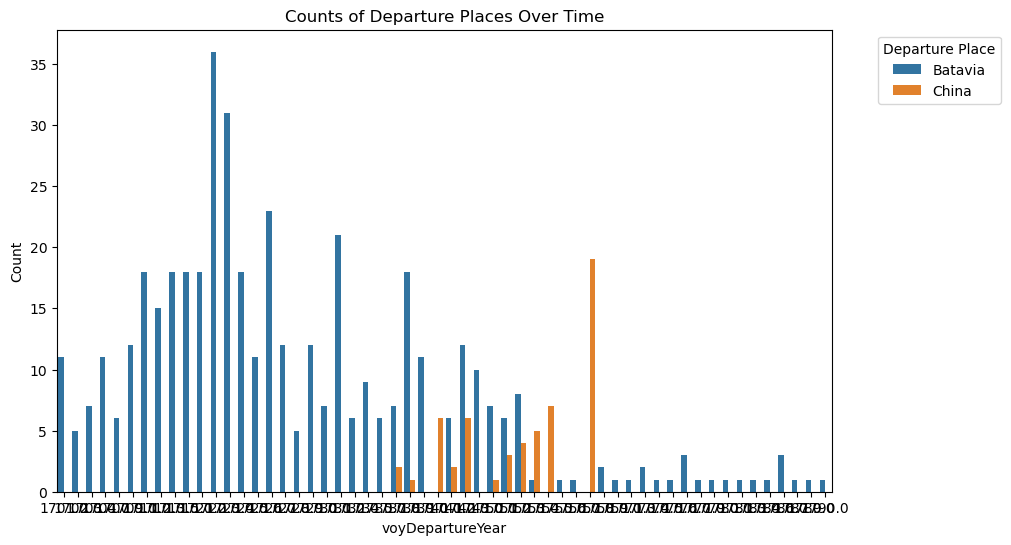

In [39]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Set the plot size for better readability
plt.figure(figsize=(10, 6))

# Plot the count of each departure place
sns.countplot(data=thee_departure_place, x='voyDepartureYear', hue='naam_y')

# Set plot title and labels
plt.title('Counts of Departure Places Over Time')
plt.xlabel('voyDepartureYear')
plt.ylabel('Count')
plt.legend(title='Departure Place', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.show()

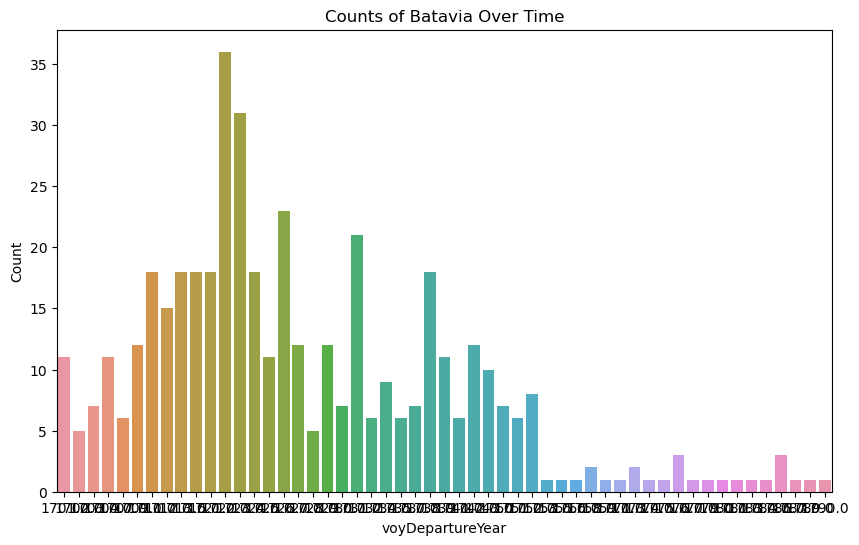

In [41]:
# Set the specific departure place to filter
specific_place = 'Batavia'

# Filter the DataFrame to include only the specific departure place
filtered_df = thee_departure_place[thee_departure_place['naam_y'] == specific_place]

# Set the plot size for better readability
plt.figure(figsize=(10, 6))

# Plot the count of the specific departure place
sns.countplot(data=filtered_df, x='voyDepartureYear')

# Set plot title and labels
plt.title(f'Counts of {specific_place} Over Time')
plt.xlabel('voyDepartureYear')
plt.ylabel('Count')

# Display the plot
plt.show()

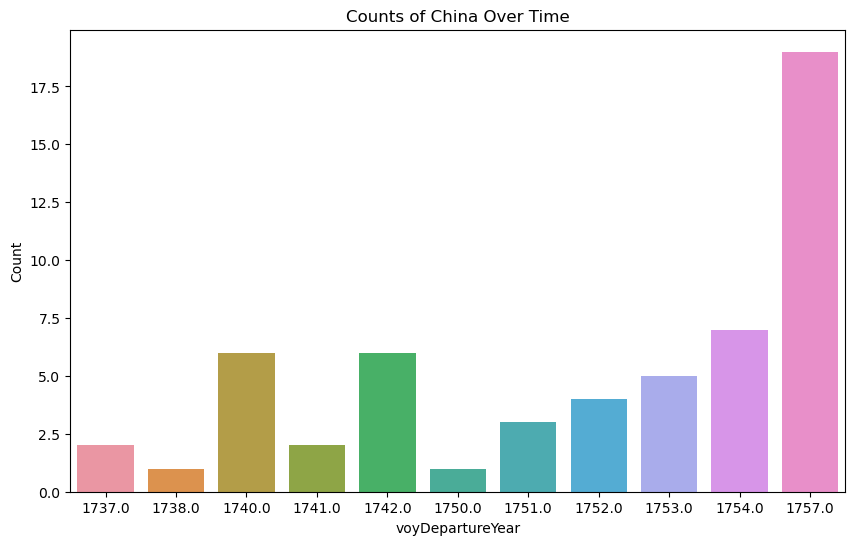

In [40]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Set the specific departure place to filter
specific_place = 'China'

# Filter the DataFrame to include only the specific departure place
filtered_df = thee_departure_place[thee_departure_place['naam_y'] == specific_place]

# Set the plot size for better readability
plt.figure(figsize=(10, 6))

# Plot the count of the specific departure place
sns.countplot(data=filtered_df, x='voyDepartureYear')

# Set plot title and labels
plt.title(f'Counts of {specific_place} Over Time')
plt.xlabel('voyDepartureYear')
plt.ylabel('Count')

# Display the plot
plt.show()

In [35]:
thee_arrival_place = pd.merge(thee, place_regio_data, left_on='voyArrivalPlaceId', right_on='id_x')
thee_arrival_place
# due to merge, "id_x" and naam_x" columns are places, "id_y" and "naam_y" columns are regions

,carId,carVoyageId,carProductId,carSpecificationId,carUnit,carQuantity,carQuantityNumeric,carValue,carValueGuldens,carValueStuivers,...,id_x,naam_x,regio,voc_place_ID,standardized toponym,URI,lat,long,id_y,naam_y
0,651075,99890,1205,871,69,8558 1/2,8558.5,"2.567,14",2567,14,...,934,Amsterdam,3185.0,vocUniquePlaceID_0207,Amsterdam NL,http://sws.geonames.org/2759794/,52.37403,4.88969,3185,Republiek
1,651016,99885,1205,871,69,107463 1/5,107463.2,"32.240,90",32240,9,...,934,Amsterdam,3185.0,vocUniquePlaceID_0207,Amsterdam NL,http://sws.geonames.org/2759794/,52.37403,4.88969,3185,Republiek
2,654806,100192,1205,731,63,5.593,5593,"192.321,50",192321,5,...,934,Amsterdam,3185.0,vocUniquePlaceID_0207,Amsterdam NL,http://sws.geonames.org/2759794/,52.37403,4.88969,3185,Republiek
3,668519,101877,1205,871,69,37.879,37879,"14.584,2,8",14584,2,...,934,Amsterdam,3185.0,vocUniquePlaceID_0207,Amsterdam NL,http://sws.geonames.org/2759794/,52.37403,4.88969,3185,Republiek
4,672008,102233,1205,871,69,236.768,236768,"81.723,9,8",81723,9,...,934,Amsterdam,3185.0,vocUniquePlaceID_0207,Amsterdam NL,http://sws.geonames.org/2759794/,52.37403,4.88969,3185,Republiek
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509,885530,117418,1205,913,69,5.751,5751,NaN,<NA>,<NA>,...,955,Enkhuizen,3185.0,vocUniquePlaceID_1528,Enkhuizen NL,http://sws.geonames.org/2756077/,52.70333,5.29167,3185,Republiek
510,885531,117418,1205,5316,69,5.451,5451,NaN,<NA>,<NA>,...,955,Enkhuizen,3185.0,vocUniquePlaceID_1528,Enkhuizen NL,http://sws.geonames.org/2756077/,52.70333,5.29167,3185,Republiek
511,896348,117916,1205,5346,69,18.781,18781,NaN,<NA>,<NA>,...,955,Enkhuizen,3185.0,vocUniquePlaceID_1528,Enkhuizen NL,http://sws.geonames.org/2756077/,52.70333,5.29167,3185,Republiek
512,896393,117918,1205,5346,69,3.251,3251,NaN,<NA>,<NA>,...,955,Enkhuizen,3185.0,vocUniquePlaceID_1528,Enkhuizen NL,http://sws.geonames.org/2756077/,52.70333,5.29167,3185,Republiek


In [36]:
# which regions are the regions where opium arrived? 
thee_arrival_place['naam_y'].value_counts()

Republiek             490
Kaap de Goede Hoop     11
Batavia                10
Bandjarmasin            2
Surat                   1
Name: naam_y, dtype: int64